## Modelo 1

código de <https://www.bayesianmodelsforastrophysicaldata.com/code-4-7>

In [69]:
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()  # Nice plot aesthetic
np.random.seed(101)

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x, sigma);
}
"""

In [20]:
# pra fazer os negócios funcionar
import nest_asyncio
nest_asyncio.apply()

# pra sumir com os warnings
import warnings
warnings.filterwarnings('ignore')  # não deu certo :(

In [ ]:
# Stan code
stan_code = """
data {
    int<lower=1> k;  
    int<lower=0> nobs;                                 
    matrix[nobs, k] x;                     
    vector[nobs] y;                     
}
parameters {
    matrix[k,1] beta;                                             
    real<lower=0> sigma;               
}
transformed parameters{
    matrix[nobs,1] mu;
    vector[nobs] mu2;

    mu = x * beta;
    mu2 = to_vector(mu);                          # normal distribution 
                                                                 # does not take matrices as input
}
model {
    for (i in 1:k){                                        # Diffuse normal priors for predictors
        beta[i] ~ normal(0.0, 100);
    }


    sigma ~ uniform(0, 100);                      # Uniform prior for standard deviation

    y ~ normal(mu2, sigma);                      # Likelihood function
}
"""

In [23]:
# Put our data in a dictionary
data = {'N': len(x), 'x': x, 'y': y}


# Compile the model
sm = stan.build(model, data=data, random_seed=1)

# Train the model and generate samples
posterior = stan.build(model, data=data, random_seed=1)
fit = posterior.sample(num_chains=4, num_samples=1000)
fit #["eta"]  # array with shape (8, 4000)


Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gr

<stan.Fit>
Parameters:
    alpha: ()
    beta: ()
    sigma: ()
Draws: 4000

In [65]:
alpha = fit['alpha'].reshape(4000,)
beta = fit['beta'].reshape(4000,)
sigma = fit['sigma'].reshape(4000,)

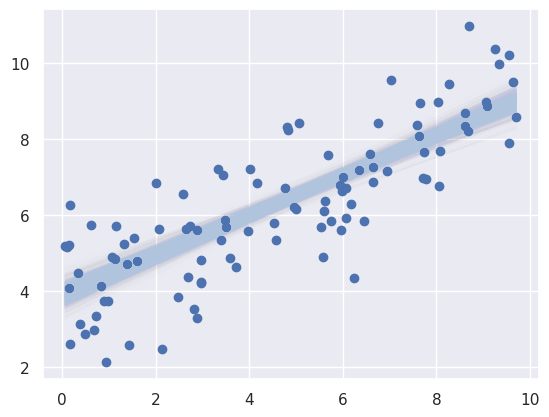

In [66]:
x_plot = np.linspace(x.min(), x.max(), 100)
plt.scatter(x,y)
for i in np.random.randint(0, len(alpha), 1000):
  plt.plot(x_plot, alpha[i] + beta[i] * x_plot, color='lightsteelblue', 
           alpha=0.005)